# Linear Discriminant Analysis (LDA) : 

1- also known as Normal Discriminant Analysis or Discriminant Function Analysis, is a dimensionality reduction technique primarily utilized in supervised classification problems. 

2- It facilitates the modeling of distinctions between groups, effectively separating two or more classes. 

3- LDA operates by projecting features from a higher-dimensional space into a lower-dimensional one. 

4- In machine learning, LDA serves as a supervised learning algorithm specifically designed for classification tasks, aiming to identify a linear combination of features that optimally segregates classes within a dataset.

# Extensions to LDA

    1- Quadratic Discriminant Analysis (QDA): Each class uses its own estimate of variance (or covariance when there are multiple input variables).

    2- Flexible Discriminant Analysis (FDA): Where non-linear combinations of inputs are used such as splines.

    3- Regularized Discriminant Analysis (RDA): Introduces regularization into the estimate of the variance (actually covariance), moderating the influence of different variables on LDA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,data=iris.data)
dataset['target'] = iris.target

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [3]:
# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [4]:
# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

In [7]:
# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

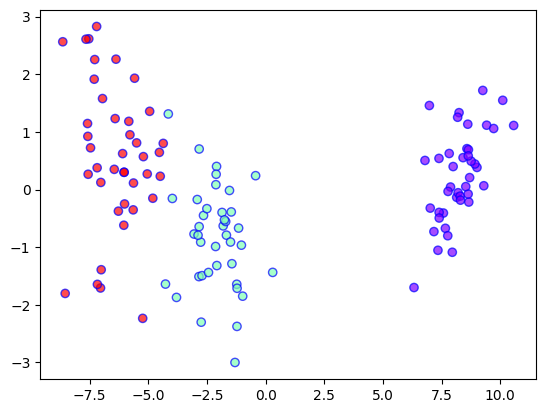

In [8]:
# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

In [9]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [10]:
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

Accuracy : 0.8666666666666667
[[9 0 0]
 [2 8 1]
 [0 1 9]]


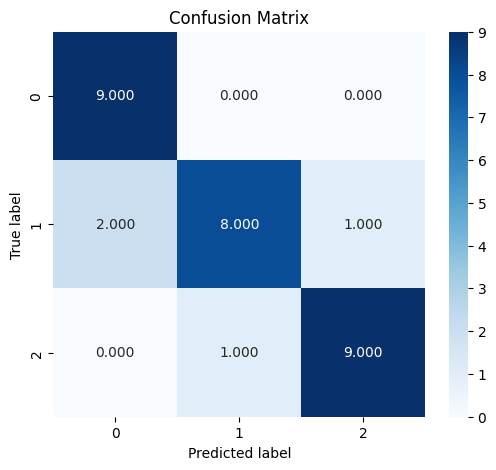

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix using heat map

plt.figure(figsize=(6,5))
sns.heatmap(conf_m, annot=True, fmt='.3f', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Advanatages & Disadvantages of using LDA

1- Advanatages of using LDA
    a- It is a simple and computationally efficient algorithm.
    
    b- It can work well even when the number of features is much larger than the number of training samples.
    
    c- It can handle multicollinearity (correlation between features) in the data.

2- Disadvantages of LDA

    a- It assumes that the data has a Gaussian distribution, which may not always be the case.
    
    b- It assumes that the covariance matrices of the different classes are equal, which may not be true in some datasets.
    
    c- It assumes that the data is linearly separable, which may not be the case for some datasets.
    
    d- It may not perform well in high-dimensional feature spaces.